# Visualize Data with and without anomalies

To do:
* Need data without anomalies to train with.

### IMU Data

In [195]:
import glob
import pandas as pd

# Path to the folder containing the CSV files
folder_path = "TFO Data\IMU"

# Get the list of CSV files in the folder
file_list = glob.glob(folder_path + "\*.csv")


In [ ]:
# # Iterate over each file
# for file_path in file_list:
#     # Read the CSV file into a pandas dataframe
#     df = pd.read_csv(file_path)
    
#     # Show the head of the dataframe
#     title = file_path.split("\\")[-1]
#     print(f"Head of {title}:")
#     print(df.head())
#     print()

In [37]:
# import matplotlib.pyplot as plt
# import numpy as np

# Fs = 100 #Hz
# columns = df.columns[2:-1]

# # Iterate over each file
# for file_path in file_list:
#     # Read the CSV file into a pandas dataframe
#     df_copy_copy_copy = pd.read_csv(file_path)
#     title = file_path.split("\\")[-1]
#     print(f"Plot of {title}")

#     fig, axes = plt.subplots(nrows=2, ncols=len(columns), figsize=(25, 5))
#     axes = axes.flatten()

#     for i, column in enumerate(columns):
#         t = np.arange(0, len(df[column])/Fs, 1/Fs)
#         axes[i].plot(t, df[column])
#         axes[i].set_title(column)
#         axes[i].set_xlabel('Time (s)')

#         # axes[i+len(columns)].magnitude_spectrum(df[column], Fs=Fs, scale='dB', color='C1')
#         axes[i+len(columns)].specgram(df[column], Fs=Fs)
#         axes[i+len(columns)].set_xlabel('Time')
#         axes[i+len(columns)].set_ylabel('Frequency')
#         axes[i+len(columns)].set_title(f'Spectrogram of {column}')
    

#     plt.tight_layout()
#     plt.show()

In [207]:
filename = "P19V2_F5.csv"
channel = "gx2"

TFO Data\IMU\P19V2_F5.csv
Plot of P19V2_F5.csv


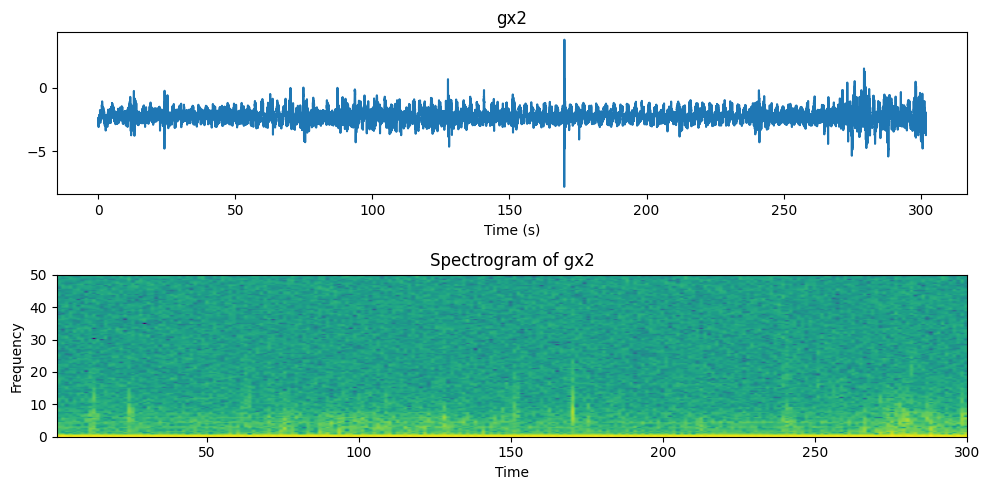

In [208]:
import matplotlib.pyplot as plt
import numpy as np

def get_file_path(filename, file_list):
    for file_path in file_list:
        if filename in file_path:
            return file_path
    return np.nan

file_path = get_file_path(filename, file_list)
print(file_path)

Fs = 100 #Hz
columns = df.columns[2:-1]

# Read the CSV file into a pandas dataframe
df = pd.read_csv(file_path)

selected_column = df[channel]

title = file_path.split("\\")[-1]
print(f"Plot of {title}")

# Generate the time array using np.linspace
t = np.linspace(0, len(selected_column)/Fs, len(selected_column))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the time series
axes[0].plot(t, selected_column)
axes[0].set_title(channel)
axes[0].set_xlabel('Time (s)')

# Plot the spectrogram
axes[1].specgram(selected_column, Fs=Fs)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Spectrogram of {channel}')

plt.tight_layout()
plt.show()

In [203]:
end = t[-1]

time1 = 0
time2 = 250

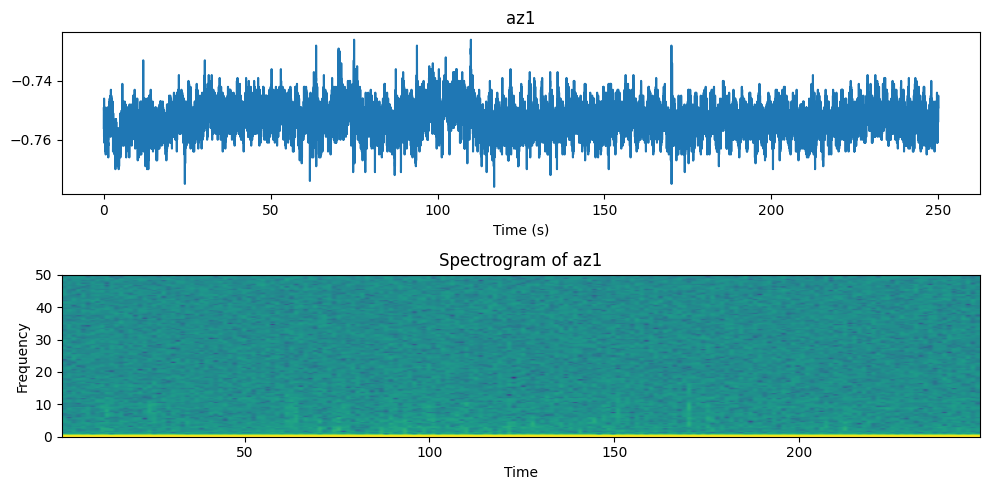

In [204]:

# Truncate the selected channel between time1 and time2
truncated_df = df[(t >= time1) & (t <= time2)]
truncated_selected_column = truncated_df[channel]

# Generate the time array using np.linspace
truncated_t = np.linspace(0, len(truncated_selected_column)/Fs, len(truncated_selected_column))

# Plot the truncated signal and spectrogram
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the time series
axes[0].plot(truncated_t, truncated_selected_column)
axes[0].set_title(channel)
axes[0].set_xlabel('Time (s)')

# Plot the spectrogram
axes[1].specgram(truncated_selected_column, Fs=Fs)
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Spectrogram of {channel}')

plt.tight_layout()
plt.show()


In [ ]:
# time1 = 147
# time2 = 160

# # Step 1: Identify indices for time1 and time2
# index1 = np.where(t == time1)[0][0]
# index2 = np.where(t == time2)[0][0]

# # Step 2: Create boolean mask
# mask = np.ones_like(t, dtype=bool)
# mask[index1:index2+1] = False

# # Step 3: Filter t and df using the mask
# filtered_t = t[mask]
# filtered_df = df.loc[mask]

# # Step 4: Interpolate the filtered values
# interpolated_df = filtered_df.interpolate(method='spline', order=3, axis=0)

# # Step 5: Replace filtered values in the original df with interpolated values
# df.loc[mask] = interpolated_df

# import matplotlib.pyplot as plt
# from scipy import signal

# # Plot the new signal
# plt.figure(figsize=(10, 5))
# plt.plot(t, selected_column)
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('New Signal')
# plt.grid(True)
# plt.show()

# # Compute and plot the spectrogram
# frequencies, times, spectrogram = signal.spectrogram(selected_column, Fs)
# plt.figure(figsize=(10, 5))
# plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram))
# plt.colorbar(label='Power Spectral Density (dB/Hz)')
# plt.xlabel('Time (s)')
# plt.ylabel('Frequency (Hz)')
# plt.title('Spectrogram')
# plt.grid(True)
# plt.show()

##### Save Data

In [189]:
import os

# Get the current directory
current_dir = os.getcwd()

# Define the directory path
clean_data_dir = os.path.join(current_dir, "TFO Data\\IMU\\Clean Data")

# Create the directory if it doesn't exist
if not os.path.exists(clean_data_dir):
    os.makedirs(clean_data_dir)

stripped_filename = os.path.splitext(filename)[0]

# Define the base filename
base_filename = f"{stripped_filename}_{selected_column.name}"

# Get the list of files in the cleanData directory
file_list = os.listdir(clean_data_dir)

# Find the number of files with the same namescheme
num_files = sum(1 for file in file_list if file.startswith(base_filename))

# Append the number to the filename
file_name = f"{base_filename}_{num_files}.csv"

# Define the file path
file_path = os.path.join(clean_data_dir, file_name)

# Save the selected_column to the file
truncated_selected_column.to_csv(file_path, index=False)

##### Assess Clean Data

In [209]:
import os
import pandas as pd

clean_data_dir = 'c:\\Users\\Conor King\\Documents\\School\\EEC 289A\\Unsupervised-Anomaly-Detection\\TFO Data\\IMU\\Clean Data'

total_duration = 0

# Iterate over each file in the clean data directory
for file_name in os.listdir(clean_data_dir):
    file_path = os.path.join(clean_data_dir, file_name)
    
    # Read the CSV file into a pandas dataframe
    df = pd.read_csv(file_path)
    
    # Calculate the duration in minutes
    duration_minutes = len(df) / Fs / 60
    
    # Add the duration to the total duration
    total_duration += duration_minutes

print(total_duration)

47.50799999999999


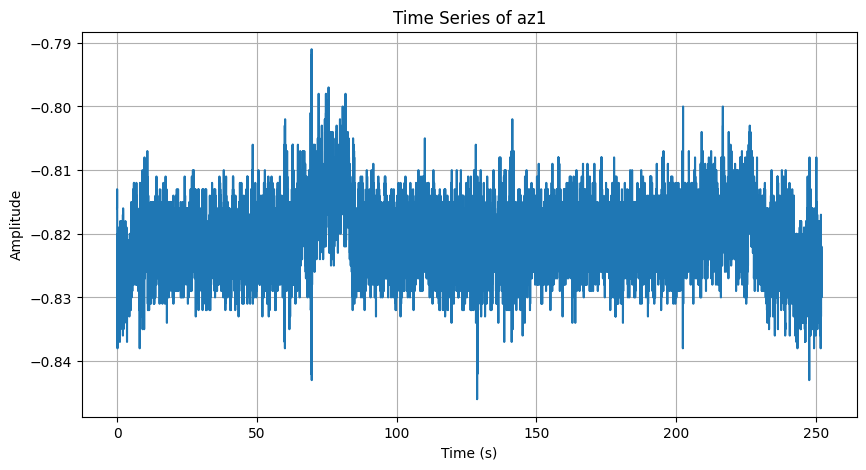

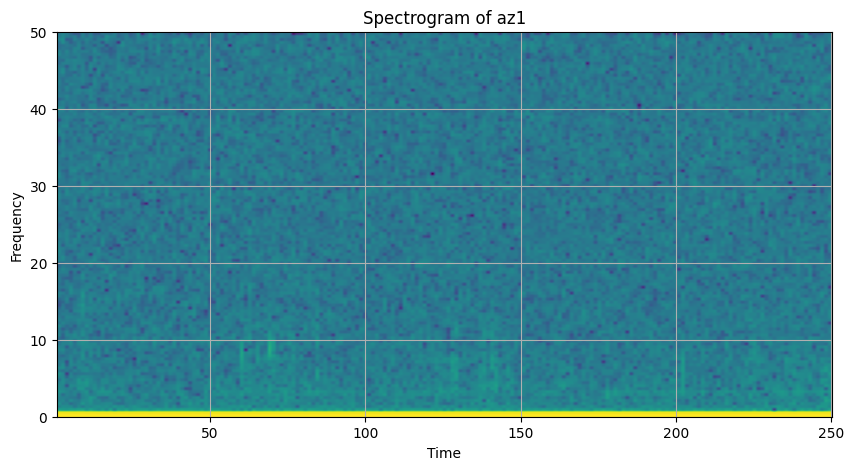

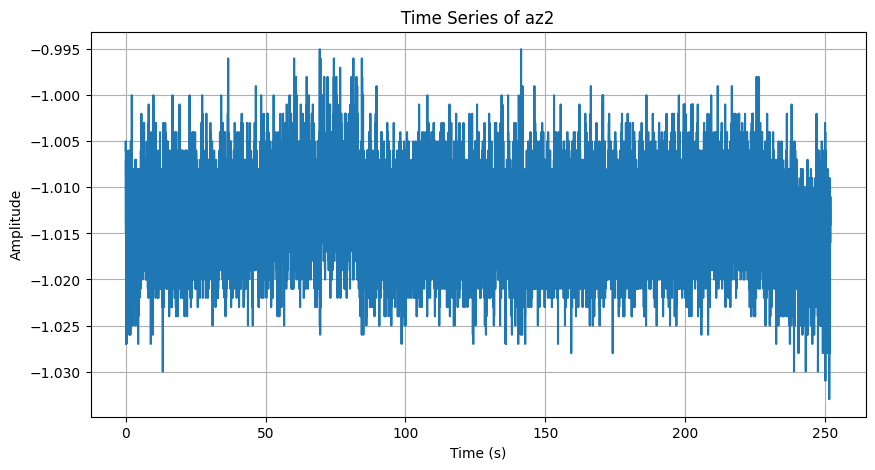

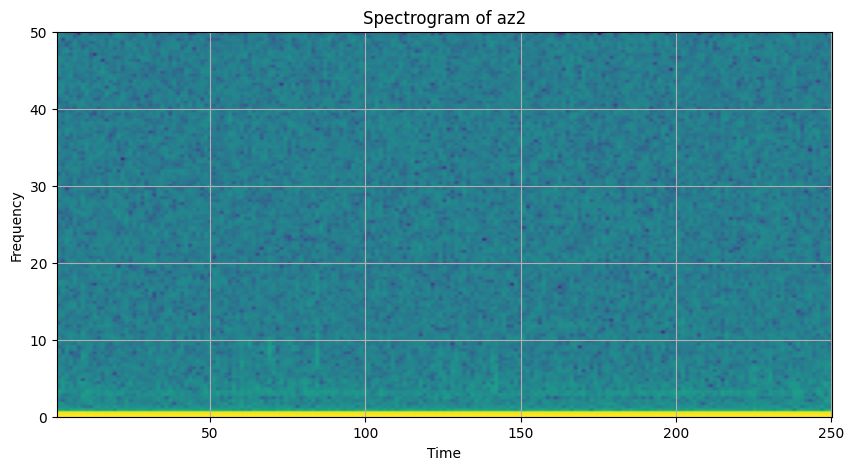

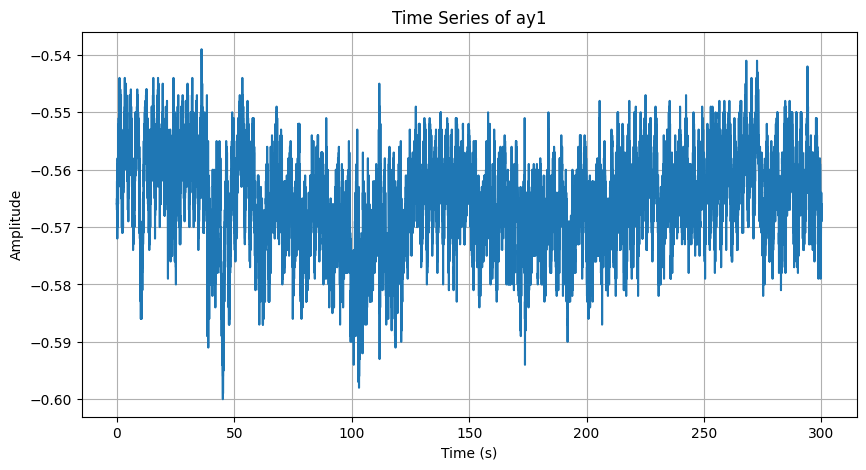

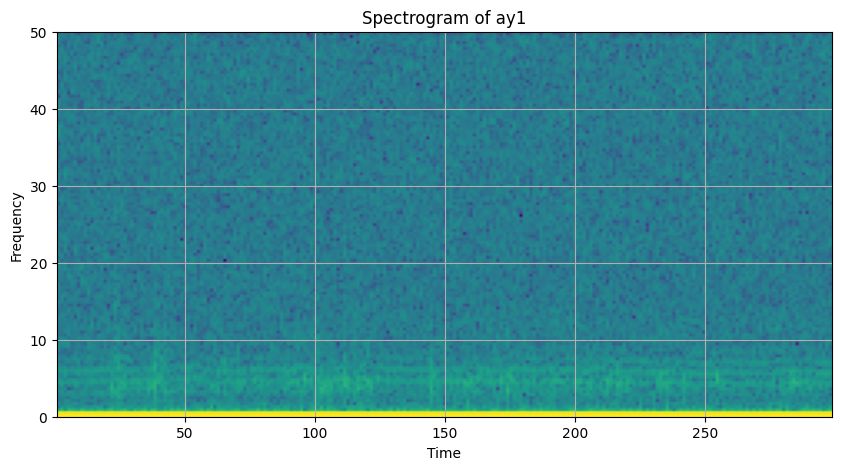

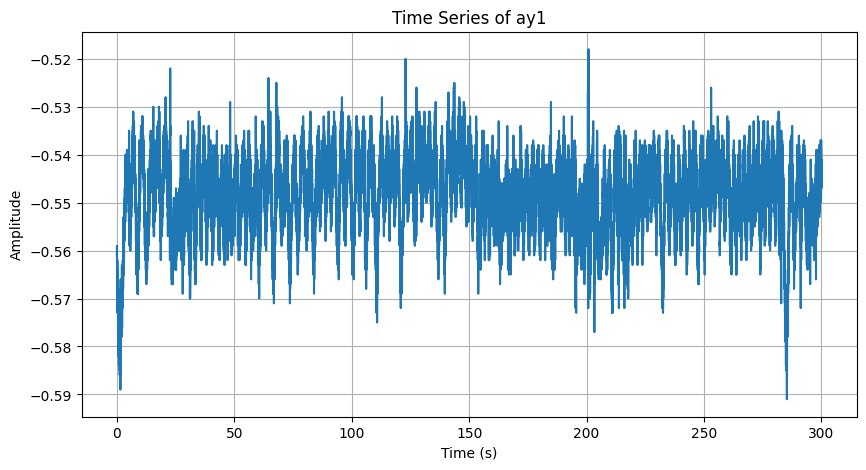

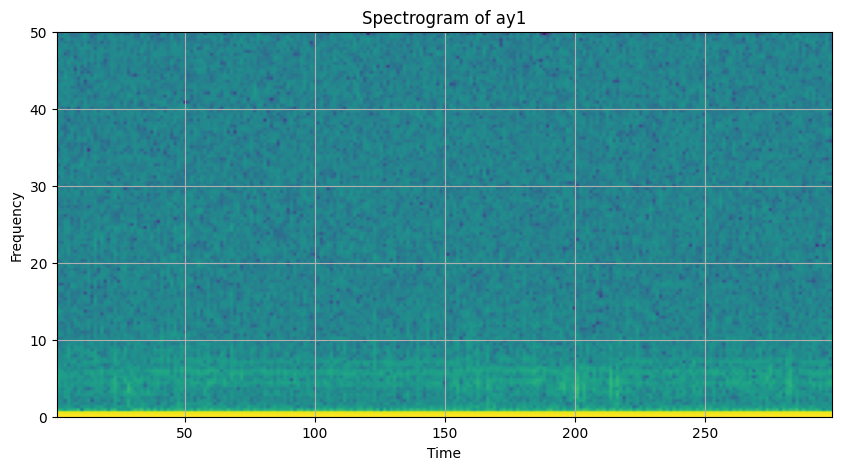

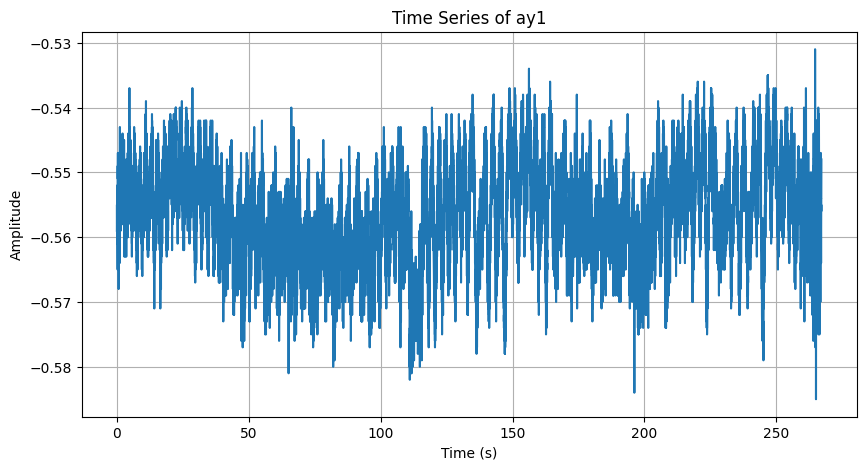

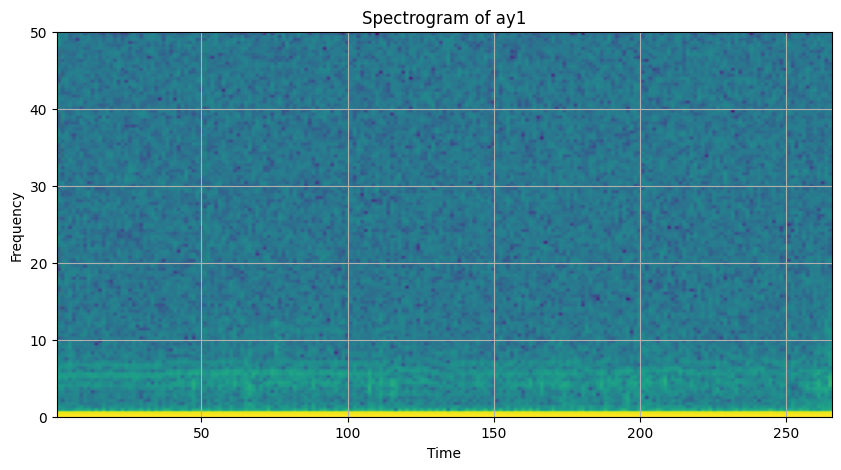

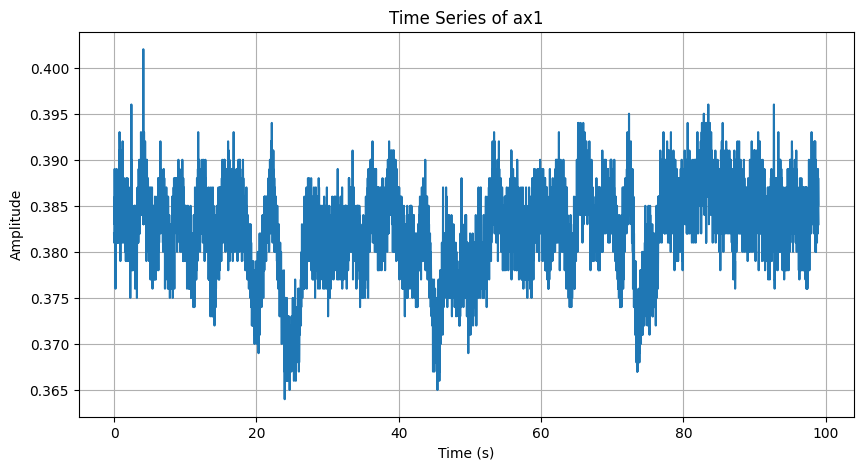

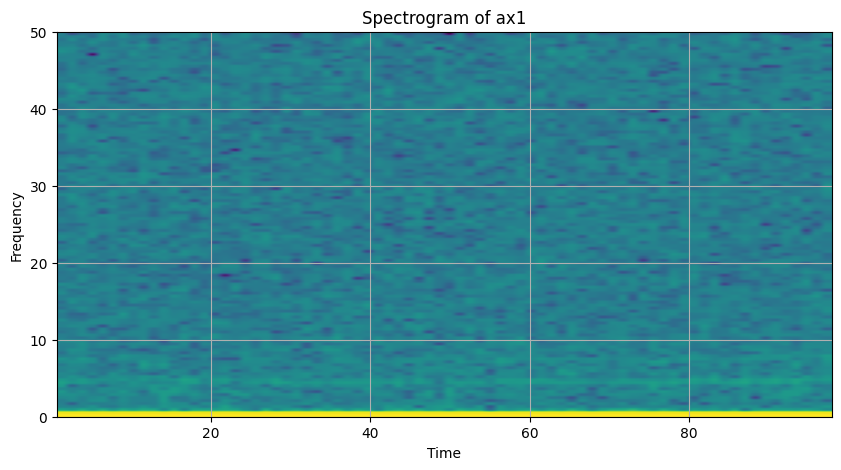

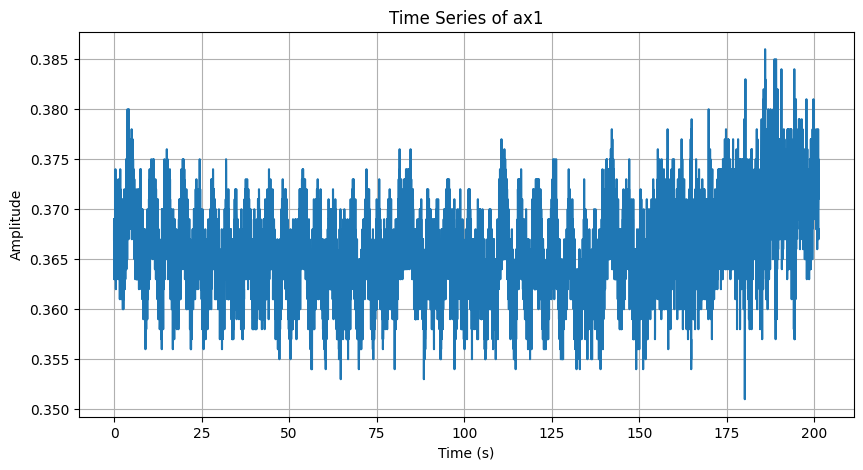

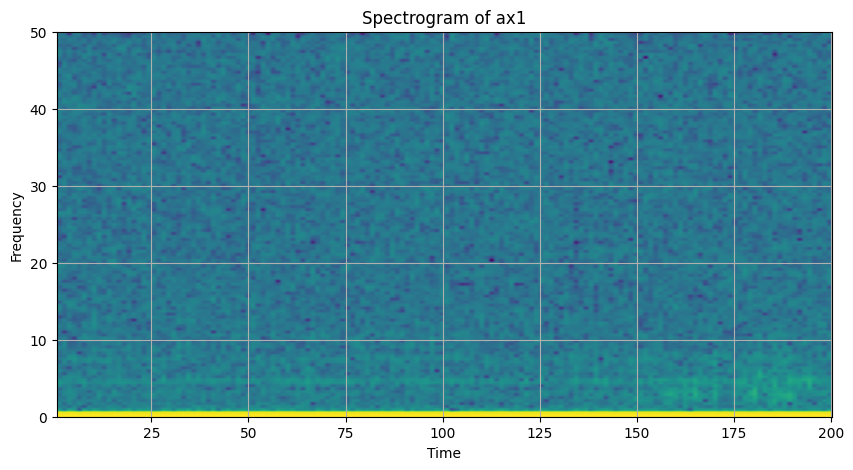

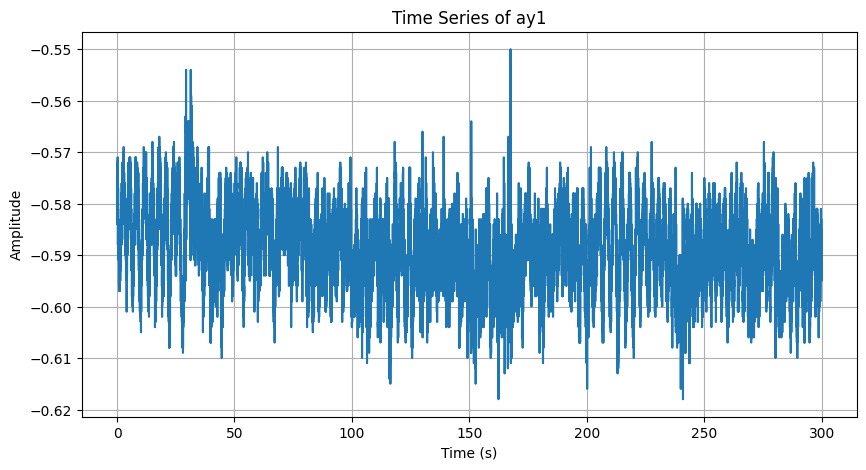

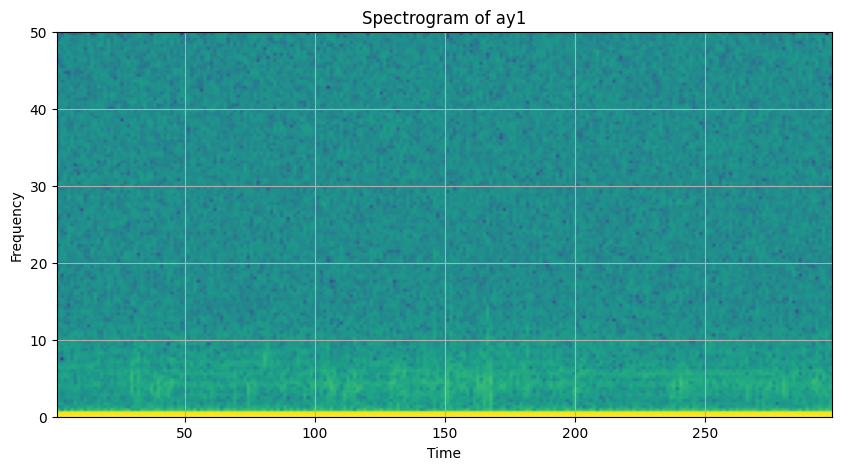

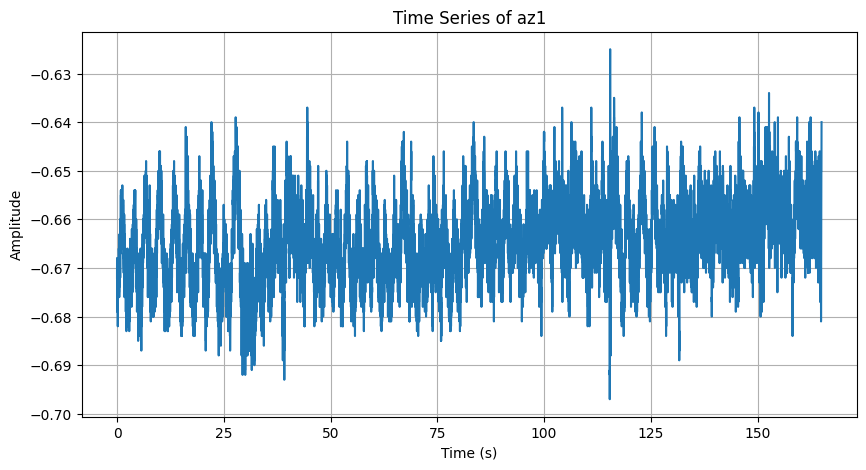

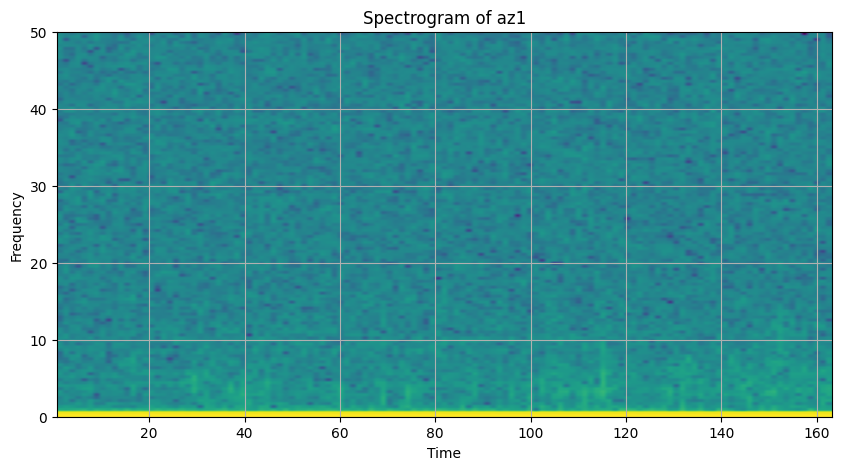

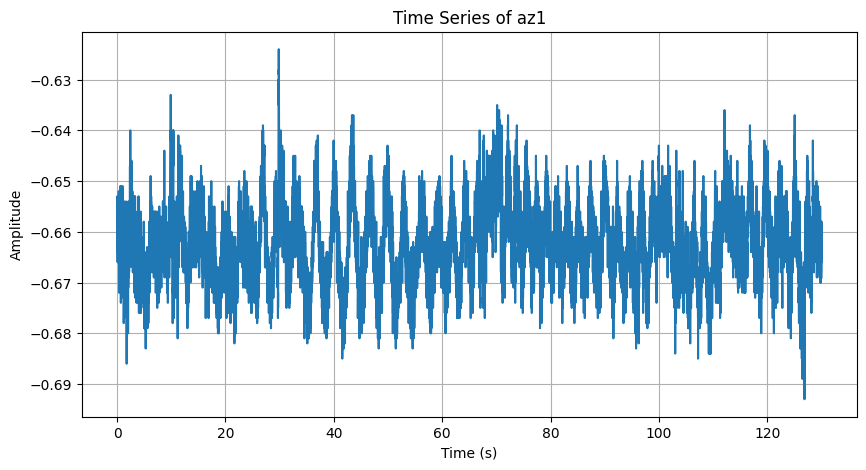

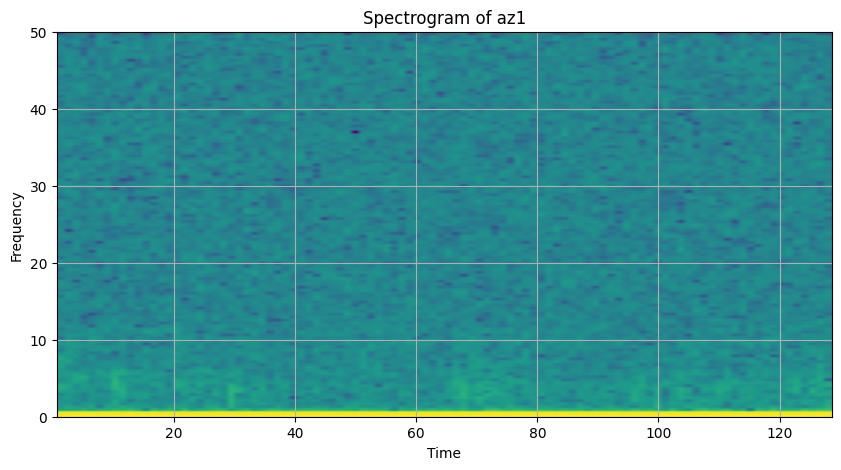

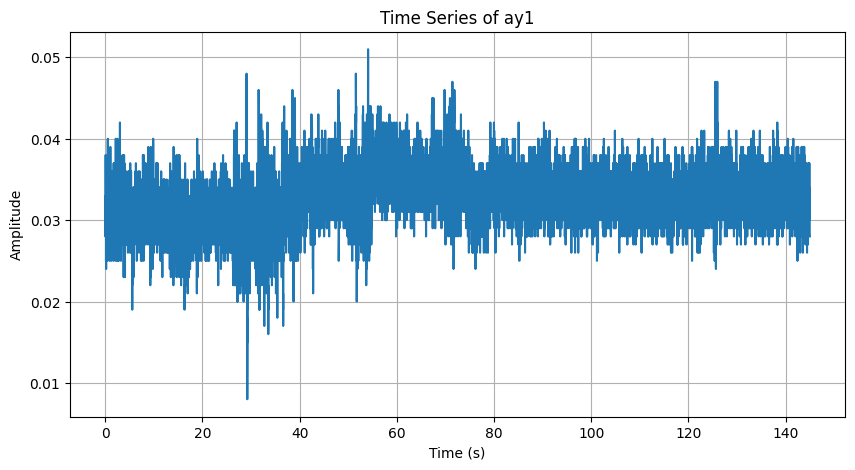

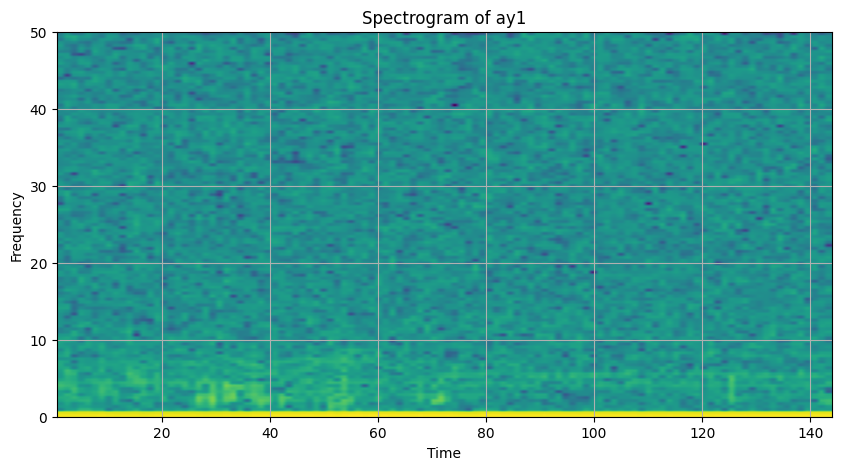

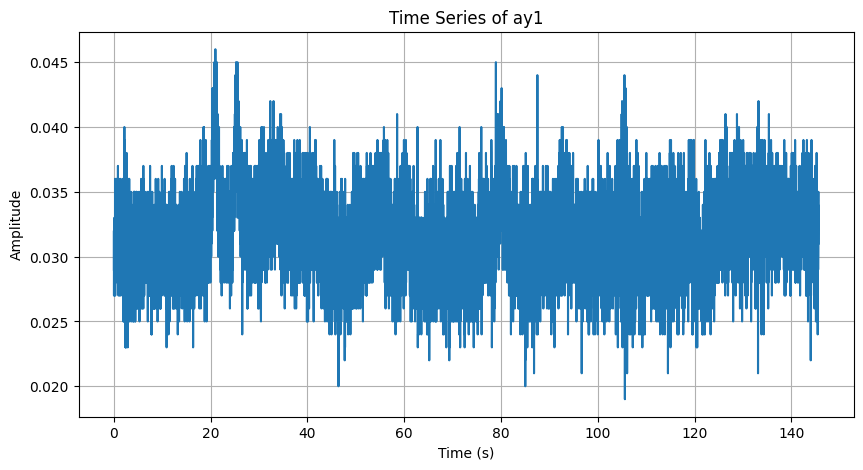

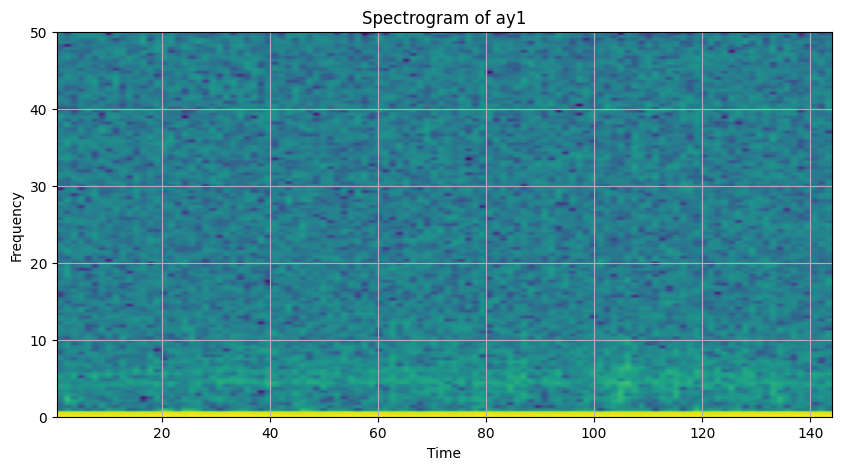

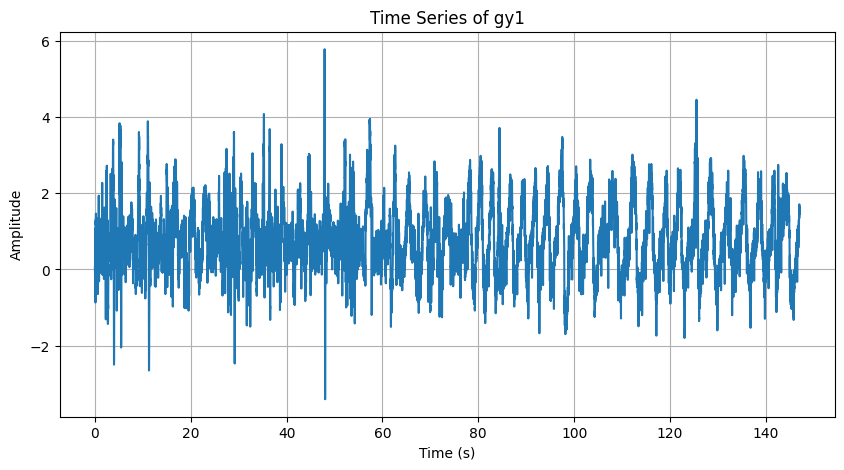

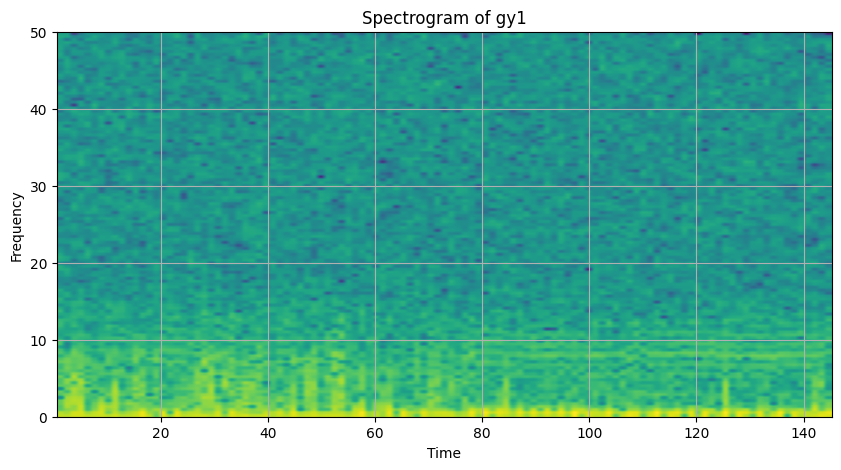

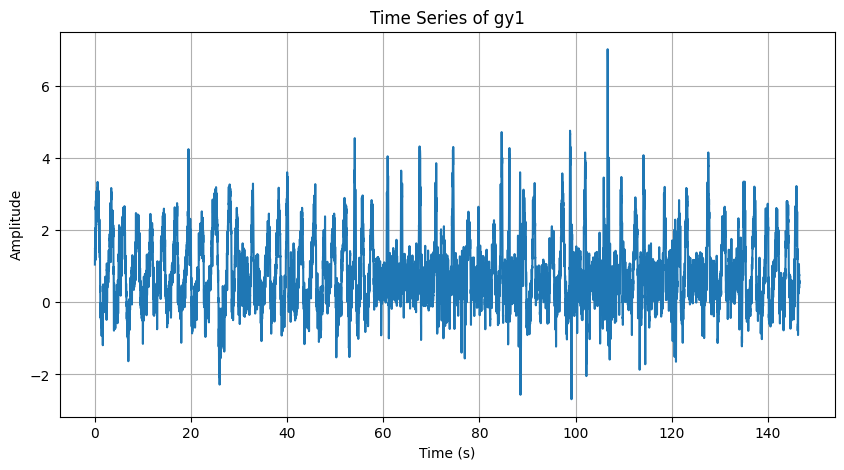

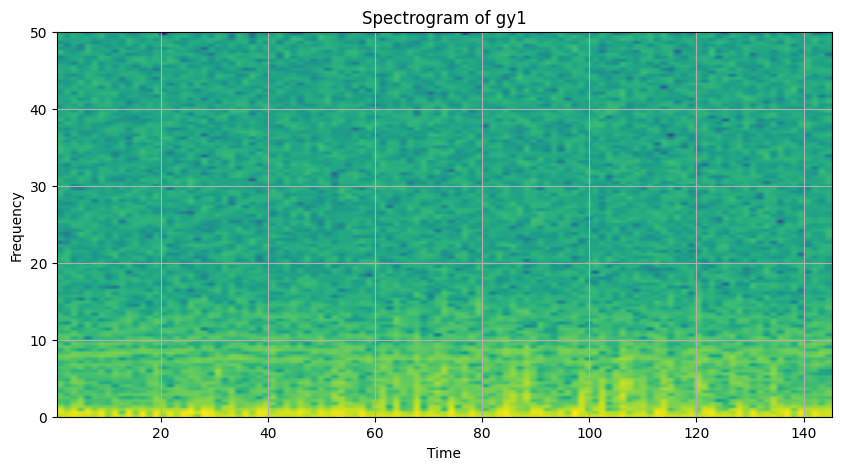

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

clean_data_dir = 'c:\\Users\\Conor King\\Documents\\School\\EEC 289A\\Unsupervised-Anomaly-Detection\\TFO Data\\IMU\\Clean Data'
Fs = 100 #Hz

# Iterate over each file in the clean data directory
for file_name in os.listdir(clean_data_dir):
    file_path = os.path.join(clean_data_dir, file_name)
    
    # Read the CSV file into a pandas dataframe
    df = pd.read_csv(file_path)
    
    # Get the channel name
    channel = df.columns[0]
    
    # Generate the time array using np.linspace
    t = np.linspace(0, len(df)/Fs, len(df))
    
    # Plot the time series and spectrogram
    selected_column = df[channel]
    
    # Check if the selected_column is empty
    if not selected_column.empty:
        # Plot the time series
        plt.figure(figsize=(10, 5))
        plt.plot(t, selected_column)
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(f'Time Series of {channel}')
        plt.grid(True)
        plt.show()
        
        # Plot the spectrogram
        plt.figure(figsize=(10, 5))
        plt.specgram(selected_column, Fs=Fs)
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        plt.title(f'Spectrogram of {channel}')
        plt.grid(True)
        plt.show()